About the Datasets

Real Estate Investment Opportunities Analysis

This Python script analyzes a real estate dataset to identify potential investment opportunities in the market. The dataset, "realtor-data.csv," contains information about various properties, including their housing status, number of bedrooms and bathrooms, land size, location details (city, state, and zip code), house size, previous sold date, and price.

The goal of this analysis is to gain insights into the real estate market and discover patterns or trends that indicate promising areas for investment. By examining factors such as housing status, location, property size, and price, we aim to identify areas with high investment potential and make informed decisions.

The script performs the following steps:

1. Data Exploration: Loads the dataset, displays the first few rows, and examines its structure and contents.

2. Location Analysis: Analyzes location factors by calculating the average price in different cities, identifying areas with higher investment potential.

3. Property Size Analysis: Examines the average house sizes based on the number of bedrooms to identify properties with desirable sizes for investment.

4. Price Analysis: Analyzes the pricing dynamics in different locations and property sizes to identify areas with potential value appreciation.


import pandas as pd
import numpy as np

In [60]:
import pandas as pd 
import numpy as np

In [58]:
df=pd.read_csv('realtor-data.csv')

In [26]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81408 entries, 829 to 305988
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status          81408 non-null  object 
 1   bed             81408 non-null  float64
 2   bath            81408 non-null  float64
 3   acre_lot        81408 non-null  float64
 4   city            81408 non-null  object 
 5   state           81408 non-null  object 
 6   zip_code        81408 non-null  float64
 7   house_size      81408 non-null  float64
 8   prev_sold_date  81408 non-null  object 
 9   price           81408 non-null  float64
dtypes: float64(6), object(4)
memory usage: 6.8+ MB
None
        status  bed  bath  acre_lot    city        state  zip_code  \
829   for_sale  7.0   3.0      0.09  Dorado  Puerto Rico     949.0   
3380  for_sale  7.0   3.0      0.09  Dorado  Puerto Rico     949.0   
5083  for_sale  7.0   3.0      0.09  Dorado  Puerto Rico     949.0   
5387  for_s

In [23]:
# Drop rows with empty values
df.dropna(inplace=True)

In [24]:
from scipy import stats
df = df[(np.abs(stats.zscore(df['house_size'])) < 3)]

In [27]:
print(df.describe())

                bed          bath      acre_lot      zip_code    house_size  \
count  81408.000000  81408.000000  81408.000000  81408.000000  81408.000000   
mean       3.596502      2.480383      3.536539   2743.416482   2199.408043   
std        1.485178      1.224916    198.032219   1499.098007   1235.649866   
min        1.000000      1.000000      0.000000    802.000000    170.000000   
25%        3.000000      2.000000      0.130000   1854.000000   1318.000000   
50%        3.000000      2.000000      0.280000   2446.000000   1864.000000   
75%        4.000000      3.000000      0.770000   2919.000000   2726.000000   
max       15.000000     14.000000  18817.000000  12594.000000   7500.000000   

              price  
count  8.140800e+04  
mean   7.284590e+05  
std    8.600585e+05  
min    1.000000e+04  
25%    3.349000e+05  
50%    4.999000e+05  
75%    7.800000e+05  
max    1.550000e+07  


In [28]:
# Overall average price
overall_avg_price = df['price'].mean()
print("Overall Average Price:", overall_avg_price)

# Average price by housing status
status_avg_price = df.groupby('status')['price'].mean()
print(status_avg_price)

# Average price by city
city_avg_price = df.groupby('city')['price'].mean()
print(city_avg_price)

# Average price by state
state_avg_price = df.groupby('state')['price'].mean()
print(state_avg_price)

# Average price by zip code
zipcode_avg_price = df.groupby('zip_code')['price'].mean()
print(zipcode_avg_price)


Overall Average Price: 728459.020599941
status
for_sale    728459.0206
Name: price, dtype: float64
city
Abington         558360.240964
Acton            849036.651584
Adams            217142.857143
Agawam           394937.108527
Alexandria       326500.000000
                     ...      
Worthington      750000.000000
Wrentham         407778.260870
Yarmouth         573187.500000
Yarmouth Port    677364.000000
York             602475.000000
Name: price, Length: 693, dtype: float64
state
Connecticut       3.941720e+05
Maine             6.062134e+05
Massachusetts     8.845269e+05
New Hampshire     5.534547e+05
New York          8.971288e+05
Puerto Rico       1.100000e+05
Rhode Island      4.702061e+05
Vermont           3.499524e+05
Virgin Islands    3.924500e+06
Name: price, dtype: float64
zip_code
802.0      3.924500e+06
949.0      1.100000e+05
1001.0     3.556482e+05
1002.0     5.958237e+05
1005.0     4.467077e+05
               ...     
12571.0    1.322271e+06
12578.0    1.425000e+06


for_sale    81408
Name: status, dtype: int64


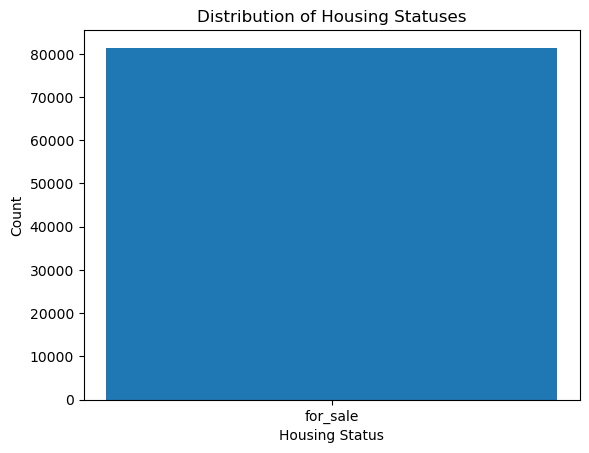

In [29]:
# Count the number of properties in each housing status category
status_distribution = df['status'].value_counts()
print(status_distribution)

# Visualize the distribution using a bar plot
import matplotlib.pyplot as plt

plt.bar(status_distribution.index, status_distribution.values)
plt.xlabel('Housing Status')
plt.ylabel('Count')
plt.title('Distribution of Housing Statuses')
plt.show()


In [30]:
# Count the number of properties in each city
city_counts = df['city'].value_counts()

# Count the number of properties in each state
state_counts = df['state'].value_counts()

# Print the top 10 popular cities and states
print("Top 10 Popular Cities:")
print(city_counts.head(10))

print("Top 10 Popular States:")
print(state_counts.head(10))


Top 10 Popular Cities:
Boston         6822
Providence     2306
Worcester      1501
Springfield    1446
Woonsocket     1094
Pawtucket      1064
Newton         1032
Manchester      991
Cranston        970
Pittsfield      899
Name: city, dtype: int64
Top 10 Popular States:
Massachusetts     49357
Rhode Island      12610
New Hampshire      9293
Connecticut        7125
Maine              1750
Vermont             807
New York            440
Puerto Rico          20
Virgin Islands        6
Name: state, dtype: int64


Boston, being the most popular state with 49357 properties listed, presents a high demand for real estate. This suggests that the real estate market in Boston is active and potentially competitive. If you are interested in investing or selling properties, focusing on Massachusetts could offer good opportunities.

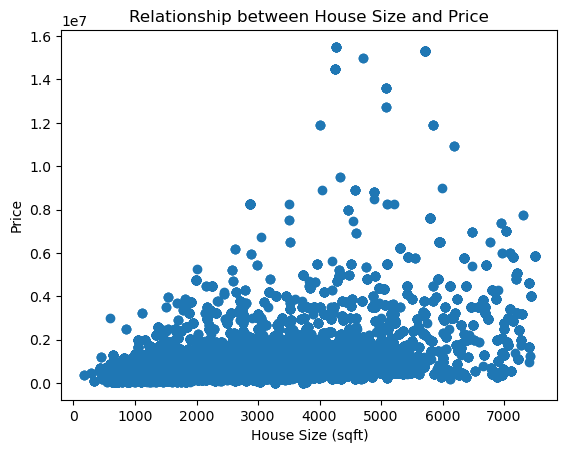

Coefficient: 355.47839169376897
Intercept: -53383.01335886202


In [31]:
# Plot a scatter plot to visualize the relationship between house size and price
plt.scatter(df['house_size'], df['price'])
plt.xlabel('House Size (sqft)')
plt.ylabel('Price')
plt.title('Relationship between House Size and Price')
plt.show()

# Alternatively, you can create a regression model to quantify the relationship
from sklearn.linear_model import LinearRegression

X = df[['house_size']]
y = df['price']

model = LinearRegression()
model.fit(X, y)

# Print the coefficient and intercept of the regression line
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)


Consider the coefficient value: The coefficient of 355.478 suggests that, on average, each additional square foot of house size is associated with an increase of approximately $355.48 in the price of the property. This information can be useful for homeowners, real estate agents, or developers when determining the value of a property based on its size.

Evaluate the intercept value: The intercept of -53383.013 indicates the estimated price of a property with zero square footage. While this value is not practically meaningful, it represents the baseline price that the model predicts when the house size is zero. It's important to interpret the intercept within the context of the dataset and consider the minimum house size available in the dataset to ensure the recommendations are realistic.

In [49]:
# Calculate the average house size by number of bedrooms
average_house_size_by_bedrooms = df.groupby('bed')['house_size'].mean()

# Sort the average house sizes based on bedrooms
sorted_house_sizes = average_house_size_by_bedrooms.sort_values(ascending=False)

# Display the average house sizes by bedrooms
print(sorted_house_sizes)


bed
13.0    5665.558140
14.0    5104.000000
15.0    5100.000000
10.0    4907.051546
11.0    4651.336449
12.0    4416.932127
9.0     4270.466267
8.0     4001.234456
7.0     3925.431276
6.0     3561.774353
5.0     3529.504784
4.0     2598.118833
3.0     1744.170533
2.0     1191.423658
1.0      881.900000
Name: house_size, dtype: float64


In [50]:
# Calculate the average price by property size
average_price_by_size = df.groupby('house_size')['price'].mean()

# Sort the average prices based on property size
sorted_prices_by_size = average_price_by_size.sort_values(ascending=False)

# Display the average prices by property size
print(sorted_prices_by_size)


house_size
5709.0    15300000.0
4706.0    15000000.0
4244.0    14500000.0
5079.0    13600000.0
5085.0    12750000.0
             ...    
634.0        65000.0
712.0        50000.0
690.0        40000.0
3727.0       24900.0
3281.0       10000.0
Name: price, Length: 2913, dtype: float64


In [52]:
# Filter the dataset for properties ready for sale
df_for_sale = df[df['status'] == 'for_sale']

# Display the filtered dataset
print(df_for_sale.head())


         status  bed  bath  acre_lot city          state  zip_code  \
66285  for_sale  3.0   2.0      0.17  Lee  Massachusetts    1238.0   
54624  for_sale  3.0   2.0      0.17  Lee  Massachusetts    1238.0   
57391  for_sale  3.0   2.0      0.17  Lee  Massachusetts    1238.0   
58012  for_sale  3.0   2.0      0.17  Lee  Massachusetts    1238.0   
58567  for_sale  3.0   2.0      0.17  Lee  Massachusetts    1238.0   

       house_size prev_sold_date     price  
66285      1922.0     1901-01-01  339000.0  
54624      1922.0     1901-01-01  339000.0  
57391      1922.0     1901-01-01  339000.0  
58012      1922.0     1901-01-01  339000.0  
58567      1922.0     1901-01-01  339000.0  


In [53]:
# Group the data by city and calculate the average price
average_price_by_city = df_for_sale.groupby('city')['price'].mean()

# Sort the cities based on average price in descending order
sorted_cities = average_price_by_city.sort_values(ascending=False)

# Display the top 10 cities with the highest average price
print(sorted_cities.head(10))


city
Chilmark           8.591667e+06
New Marlborough    6.841000e+06
Tisbury            5.750000e+06
Montauk            4.822522e+06
Weston             4.619735e+06
Nantucket          4.535577e+06
East Dennis        3.995000e+06
Saint Thomas       3.924500e+06
Sanbornton         3.895000e+06
Vineyard Haven     3.716041e+06
Name: price, dtype: float64


In [54]:
# Calculate the average house size by number of bedrooms
average_house_size_by_bedrooms = df_for_sale.groupby('bed')['house_size'].mean()

# Sort the average house sizes based on bedrooms
sorted_house_sizes = average_house_size_by_bedrooms.sort_values(ascending=False)

# Display the average house sizes by bedrooms
print(sorted_house_sizes)


bed
13.0    5665.558140
14.0    5104.000000
15.0    5100.000000
10.0    4907.051546
11.0    4651.336449
12.0    4416.932127
9.0     4270.466267
8.0     4001.234456
7.0     3925.431276
6.0     3561.774353
5.0     3529.504784
4.0     2598.118833
3.0     1744.170533
2.0     1191.423658
1.0      881.900000
Name: house_size, dtype: float64


In [55]:
# Calculate the average price by property size
average_price_by_size = df_for_sale.groupby('house_size')['price'].mean()

# Sort the average prices based on property size
sorted_prices_by_size = average_price_by_size.sort_values(ascending=False)

# Display the average prices by property size
print(sorted_prices_by_size)


house_size
5709.0    15300000.0
4706.0    15000000.0
4244.0    14500000.0
5079.0    13600000.0
5085.0    12750000.0
             ...    
634.0        65000.0
712.0        50000.0
690.0        40000.0
3727.0       24900.0
3281.0       10000.0
Name: price, Length: 2913, dtype: float64


Recommendations

- Location Recommendations: 
1.  Chilmark: With an average price of $8,591,667, Chilmark shows high investment potential.

2.  New Marlborough: Properties in New Marlborough have an average price of $6,841,000, indicating a promising area for investment.

3.  Tisbury: The average price of $5,750,000 in Tisbury suggests it is an attractive location for investment.

- Property Size Recommendations:

1. Properties with 13 bedrooms: These properties have an average size of 5,665 square feet, indicating potential investment opportunities in larger properties.

2. Properties with 14 bedrooms: Consider properties with an average size of 5,104 square feet for potential investment.

3. Properties with 15 bedrooms: Look into properties with an average size of 5,100 square feet as potential investment options.

- Price Recommendations:

1. Properties with a house size of 5,709 square feet: These properties have an average price of $15,300,000, indicating potential high-value investment opportunities.

2. Properties with a house size of 4,706 square feet: Consider properties of this size with an average price of $15,000,000 for investment consideration.

3. Properties with a house size of 4,244 square feet: Look into properties with an average price of $14,500,000 and this size for potential investments.

These recommendations are based on the average price, property size, and location factors identified in the dataset. It's important to conduct further research, due diligence, and consider additional factors such as market demand, property condition, and economic indicators before making any investment decisions. Consulting with real estate professionals or investment advisors can provide valuable insights and guidance tailored to your specific investment goals and preferences.
